# Se voglio ricostruire una coppia di elettroni di carica opposta come faccio?


/home/orso/AnalisiDati/6. Concetti di ricostruzione: prompt, non-prompt, fake. Ricostruzione della massa del bosone Z
il File c'è già! Non sarà riscaricato.
0
--2023-01-27 12:05:17--  https://github.com/oiorio/AnalisiDati/raw/main/5.%20Entuple%20e%20formati%20di%20dati%20complessi/DYJets.root
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/oiorio/AnalisiDati/main/5.%20Entuple%20e%20formati%20di%20dati%20complessi/DYJets.root [following]
--2023-01-27 12:05:18--  https://raw.githubusercontent.com/oiorio/AnalisiDati/main/5.%20Entuple%20e%20formati%20di%20dati%20complessi/DYJets.root
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awa

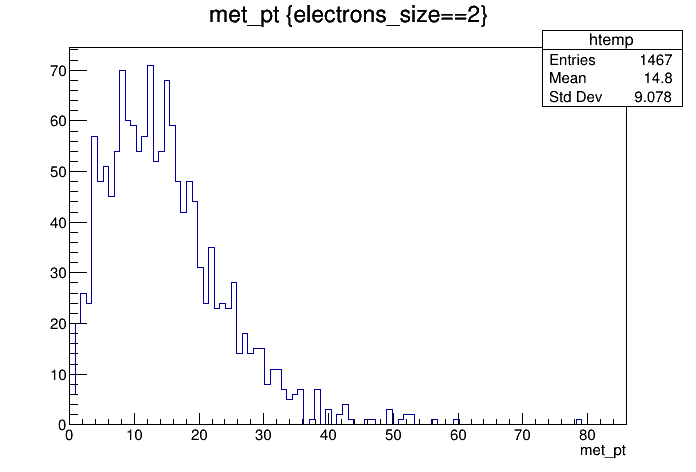

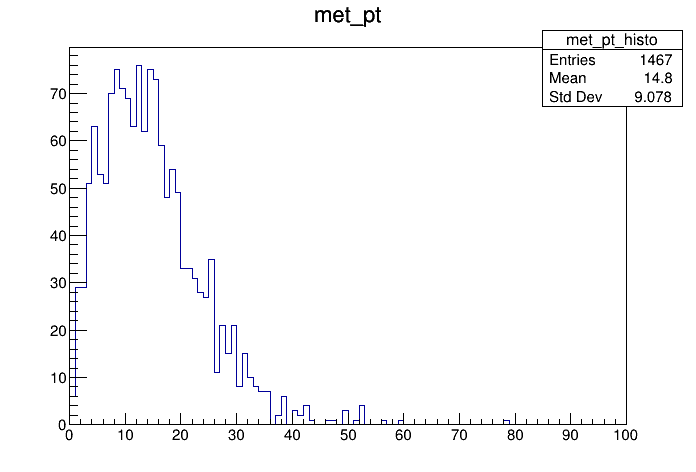

***********************************************
*    Row   * Instance * electrons * electrons *
***********************************************
*        0 *        0 *         0 *           *
*        1 *        0 *         1 *         1 *
*        2 *        0 *         2 *        -1 *
*        2 *        1 *         2 *         1 *
*        3 *        0 *         0 *           *
*        4 *        0 *         1 *         1 *
*        5 *        0 *         0 *           *
*        6 *        0 *         0 *           *
*        7 *        0 *         0 *           *
*        8 *        0 *         0 *           *
*        9 *        0 *         0 *           *
*       10 *        0 *         0 *           *
*       11 *        0 *         2 *         1 *
*       11 *        1 *         2 *        -1 *
*       12 *        0 *         0 *           *
*       13 *        0 *         2 *         1 *
*       13 *        1 *         2 *        -1 *
*       14 *        0 *         0 *     

Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> 

In [1]:
#Prima cosa: giriamo il notebook precedente 
%run ../5.\ Entuple\ e\ formati\ di\ dati\ complessi/trees_and_ntuples.ipynb

In [2]:
#Non solo l'output, anche il tree è presente!
mytree
mytree.GetEntries()

10000

## Ora facciamo un loop sugli eventi!

In [3]:
mytree.Print("jets*")

******************************************************************************
*Tree    :events    : events                                                 *
*Entries :    10000 : Total =         6072458 bytes  File  Size =    2146782 *
*        :          : Tree compression factor =   2.82                       *
******************************************************************************
*Br    0 :jets_size : jets_size/I                                            *
*Entries :    10000 : Total  Size=      40665 bytes  File Size  =       7268 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   5.53     *
*............................................................................*
*Br    1 :jets_pt   : vector<float>                                          *
*Entries :    10000 : Total  Size=     215929 bytes  File Size  =     112912 *
*Baskets :        8 : Basket Size=      32000 bytes  Compression=   1.91     *
*...................................................

In [4]:
h_jet_mass = ROOT.TH1F("Jets_mass_0","Leading jet pt",100,0,100) 
for i in range (mytree.GetEntries()):
    mytree.GetEntry(i)
    #Ogni 1000 eventi stampo a schermo il vettore dei jet!
    if(i%1000==0):print( "event #", i, "n jets ",mytree.jets_size, " pt: ",mytree.jets_pt)
    #Se c'è almeno 1 jet: stampo il pt

    if(mytree.jets_size):
            jet_0 = ROOT.TLorentzVector()
            jet_0.SetPtEtaPhiE(mytree.jets_pt[0],mytree.jets_eta[0],mytree.jets_phi[0],mytree.jets_e[0])
            if(i%1000==0):print("leading jet pt",mytree.jets_pt[0]," mass? ",jet_0.M())
            h_jet_mass.Fill(jet_0.Pt())

event # 0 n jets  2  pt:  { 56.3023f, 55.8997f }
leading jet pt 56.30229949951172  mass?  5.134994026979267
event # 1000 n jets  3  pt:  { 30.0213f, 25.7592f, 22.6790f }
leading jet pt 30.02133560180664  mass?  4.819653273611887
event # 2000 n jets  2  pt:  { 45.6171f, 35.1373f }
leading jet pt 45.61709213256836  mass?  4.819771473086346
event # 3000 n jets  2  pt:  { 22.3066f, 20.7958f }
leading jet pt 22.306556701660156  mass?  6.789703805725764
event # 4000 n jets  3  pt:  { 65.5453f, 39.3958f, 35.9018f }
leading jet pt 65.54531860351562  mass?  12.201516049901832
event # 5000 n jets  2  pt:  { 58.5544f, 49.1629f }
leading jet pt 58.5544319152832  mass?  12.885972862458438
event # 6000 n jets  3  pt:  { 58.3725f, 37.2806f, 23.7087f }
leading jet pt 58.37245178222656  mass?  4.705065603508283
event # 7000 n jets  1  pt:  { 32.0088f }
leading jet pt 32.00883102416992  mass?  3.7364037975131237
event # 8000 n jets  3  pt:  { 38.3194f, 34.4998f, 20.6476f }
leading jet pt 38.319358825683

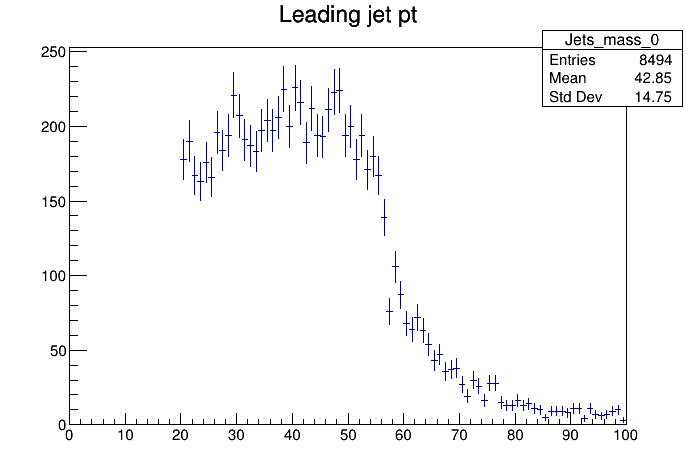

In [5]:
#Diseg
c1= ROOT.TCanvas()
c1.Draw()
h_jet_mass.Draw("e")





## Esercizio 1:

Proviamo a fare la somma vettoriale  di due elettroni di carica opposta e disegnarne la massa.
Facciamo lo stesso coi muoni.

### 1.1 Che forma ha questa distribuzione

### 1.2 Quante coppie avrò per evento?


## Esercizio 2: 

Proviamo a fittare la distribuzione che viene fuori, ad es. con gauss + expo, o... altro?


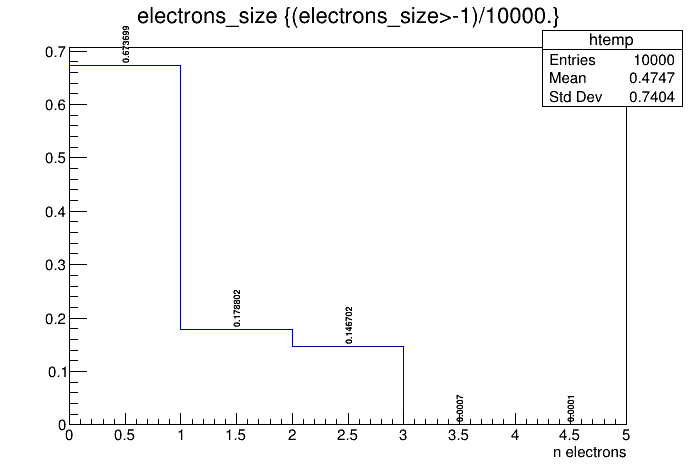

In [6]:
mytree.Draw("electrons_size","(electrons_size>-1)/10000.","histotext")
mytree.GetHistogram().GetXaxis().SetTitle("n electrons")
c1.SetLogy(0)
c1.Draw("")

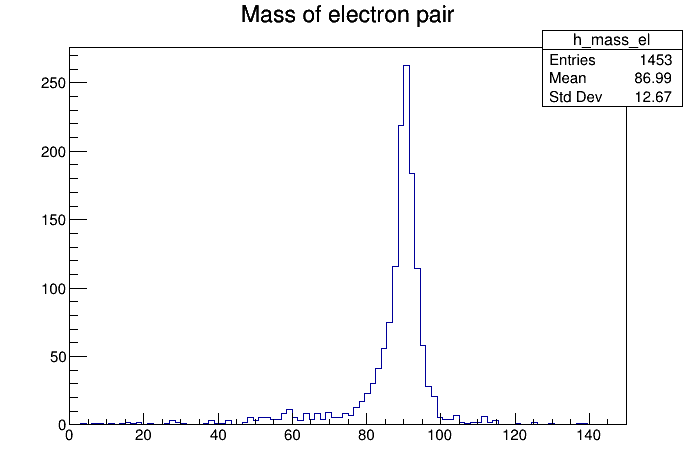

In [7]:
m_min=0
m_max=150
h_mass_el=ROOT.TH1F("h_mass_el","Mass of electron pair",100,m_min,m_max)
h_mass_mu=ROOT.TH1F("h_mass_mu","Mass of muon pair",100,m_min,m_max)



for i in range(mytree.GetEntries()):
#for i in range(100):
    mytree.GetEntry(i)
    for ei in range(mytree.electrons_size):
        #for ej in range(mytree.electrons_size): NOPE
        for ej in range(ei): #YES!
        #for ej in range(ei+1,mytree.electrons_size): ALSO YES!
            if mytree.electrons_charge[ei]* mytree.electrons_charge[ej]<0:
                e1=ROOT.TLorentzVector()
                e2=ROOT.TLorentzVector()
                e1.SetPtEtaPhiE(mytree.electrons_pt[ei],mytree.electrons_eta[ei],mytree.electrons_phi[ei],mytree.electrons_e[ei])
                e2.SetPtEtaPhiE(mytree.electrons_pt[ej],mytree.electrons_eta[ej],mytree.electrons_phi[ej],mytree.electrons_e[ej])
                h_mass_el.Fill((e1+e2).M())


c1=ROOT.TCanvas("masses")
c1.Draw()
h_mass_el.Draw()

In [8]:
#Let's take a step further - a bit less monke

#1 Classe "particella"
class particle:
    def __init__(self, pt,eta,phi,e,charge,flavor):
        self.pt=pt
        self.eta=eta
        self.phi=phi
        self.e=e
        self.charge=charge
        self.flavor=flavor
        self.p4 = ROOT.TLorentzVector()
        self.p4.SetPtEtaPhiE(pt,eta,phi,e)
        
#2 Metodo per estrarla:    
def get_particle(tree=mytree,var="muontracks",index=0):
    flav_dict={"muontracks":13,"electrons":11}
    p= particle(getattr(tree,var+"_pt")[index],#getattr chiama dall'esterno un attributo con il nome preso come stringa
                getattr(tree,var+"_eta")[index],
                getattr(tree,var+"_phi")[index],
                getattr(tree,var+"_e")[index],
                getattr(tree,var+"_charge")[index] if hasattr(tree,var+"_charge") else 0,#nota: questo per i jet fallirà se non faccio qualcosa!
                -1*getattr(tree,var+"_charge")[index]*(flav_dict[var]) if hasattr(tree,var+"_charge") else 0)
    return p

def get_collection(tree=mytree,var="muontracks"):
    particles=[get_particle(tree,var,i) for i in range(getattr(tree,var+"_size"))]
    return particles

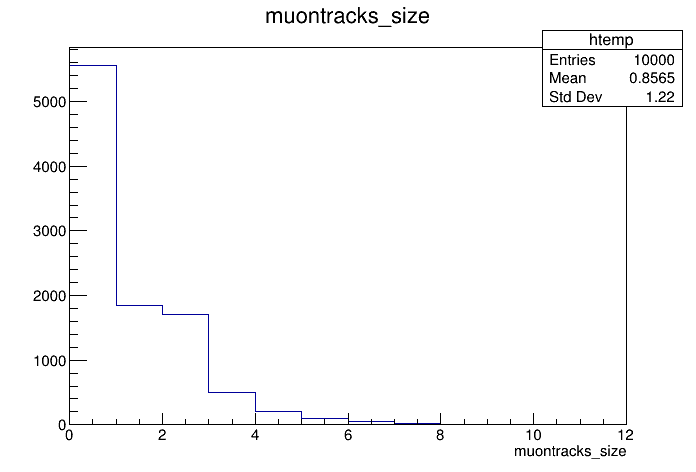

In [9]:
mytree.Draw("muontracks_size")
c1.Draw()
c1.SetLogy(0)

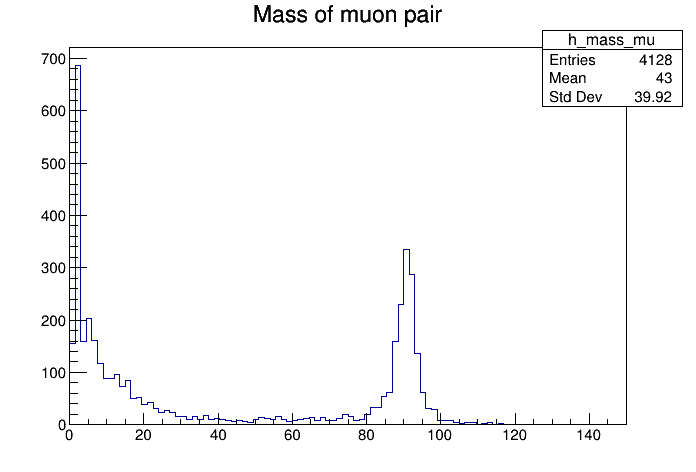

In [10]:
are_os = lambda x,y: x.charge*y.charge<0 #Uso lambda per vedere se sono segno opposto (opposite sign)
#equivalente a:
def are_os_v2(x,y):
    return x.charge*y.charge<0
are_ss = lambda x,y: x.charge*y.charge>0 # o same sign (ss) -> quest'ultimo è ridondante in realtà!

h_mass_mu.Reset("ICES")

h_mass_mu_ss=h_mass_mu.Clone("h_mass_mu_ss")


for i in range(mytree.GetEntries()):
#for i in range(100):
    mytree.GetEntry(i)
    muons=get_collection(mytree,"muontracks")
    electrons=get_collection(mytree,"electrons")
    jets=get_collection(mytree,"jets")
    for mi in range(len(muons)):
        for mj in range(mi):
            if(are_os(muons[mi],muons[mj])):
                h_mass_mu.Fill((muons[mi].p4+muons[mj].p4).M())
            else:
                h_mass_mu_ss.Fill((muons[mi].p4+muons[mj].p4).M())
            
c1.Draw()
h_mass_mu.Draw()

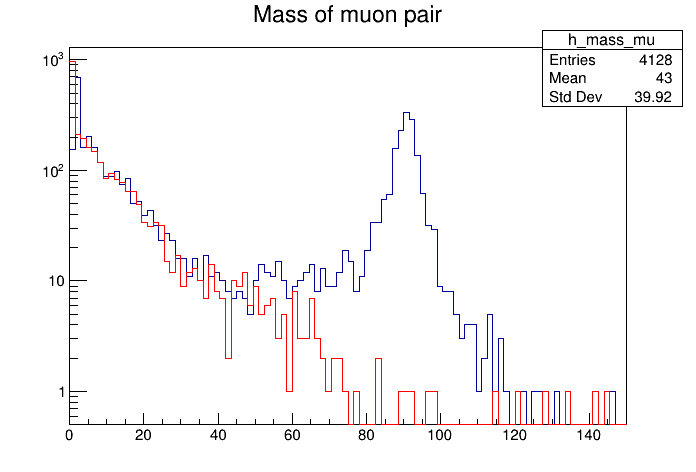

In [11]:
c1.Draw()
h_mass_mu_ss.SetLineColor(ROOT.kRed)
h_mass_mu_ss.Draw("same")
c1.SetLogy()

In [12]:
m_min_fit=10
bkg = ROOT.TF1("expo_bkg_1","[0]/[1]*exp(-x/[1])",m_min_fit,m_max)
bkg.SetParameters(1000,20)
h_mass_mu_ss.Fit(bkg,"SR")

 FCN=93.3245 FROM MIGRAD    STATUS=CONVERGED      68 CALLS          69 TOTAL
                     EDM=3.97392e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.67172e+03   1.65904e+02   4.74413e-01  -9.61526e-07
   2  p1           1.15034e+01   6.32761e-01   1.81085e-03   2.17712e-04


 FCN=57.3184 FROM MIGRAD    STATUS=CONVERGED     700 CALLS         701 TOTAL
                     EDM=7.63623e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           8.30660e+04   1.86253e+04   1.00268e+01  -1.72524e-08
   2  p1           1.79480e+02   4.82460e+01   1.21713e-02  -2.47416e-05
   3  p2           2.65699e+01   6.01817e+00   8.20892e-04   1.55309e-03
   4  p3          -2.20780e-01   4.67446e-02   1.17925e-05   2.54151e-01
   5  p4           6.28440e-04   1.92784e-04   1.10056e-07   3.29694e+01


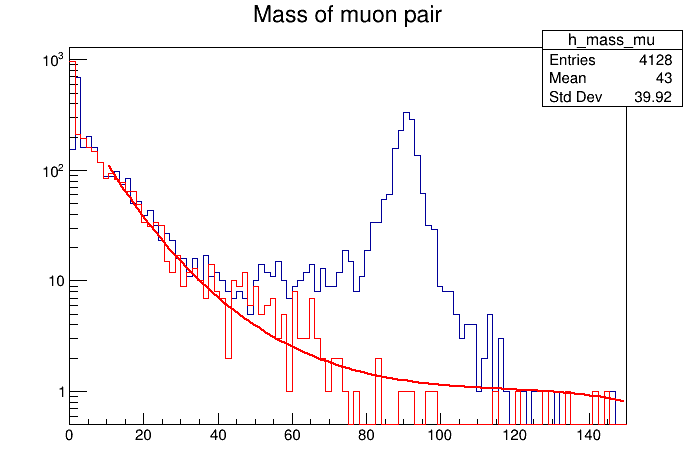

In [13]:
#Forse si può migliorare un po'...
m_min_fit= 10
bkg2 = ROOT.TF1("expo_bkg_2","[0]/[1]*exp(-([2]*x+[3]*x*x+[4]*x*x*x)/[1])",m_min_fit,m_max)
bkg2.SetParameters(1000,20,1,1,0.1)
c1.Draw()
h_mass_mu_ss.Fit(bkg2,"SR")

In [14]:
mytree.Print("muontracks*")

******************************************************************************
*Tree    :events    : events                                                 *
*Entries :    10000 : Total =         6072486 bytes  File  Size =    2146782 *
*        :          : Tree compression factor =   2.82                       *
******************************************************************************
*Br    0 :muontracks_size : muontracks_size/I                                *
*Entries :    10000 : Total  Size=      40701 bytes  File Size  =       6331 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   6.34     *
*............................................................................*
*Br    1 :muontracks_pt : vector<float>                                      *
*Entries :    10000 : Total  Size=     175439 bytes  File Size  =      71181 *
*Baskets :        7 : Basket Size=      32000 bytes  Compression=   2.46     *
*...................................................

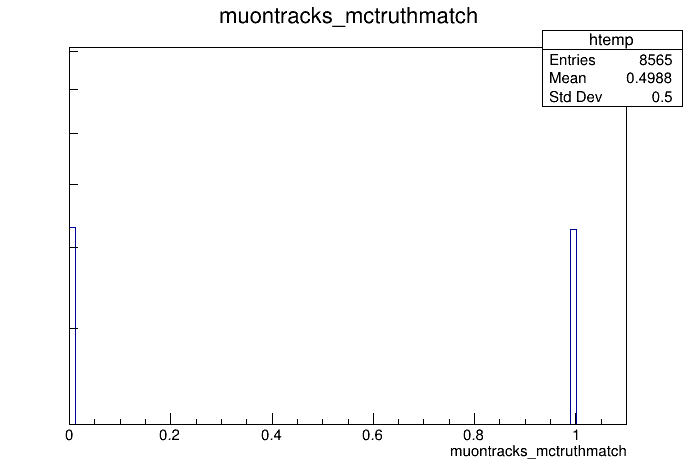

In [15]:
mytree.Draw("muontracks_mctruthmatch")
c1.Draw()

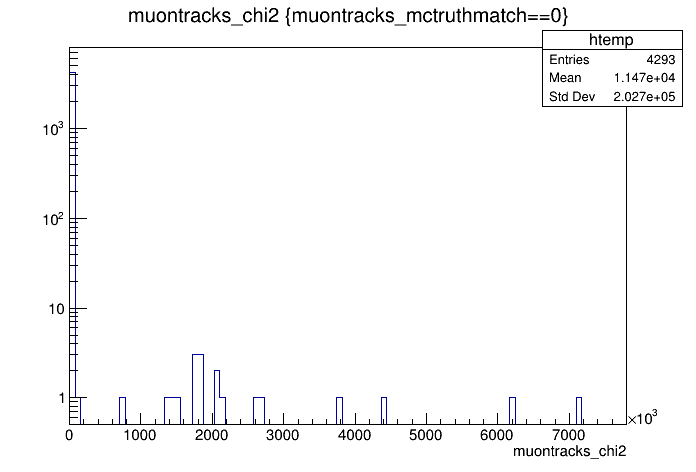

In [16]:
mytree.Draw("muontracks_chi2","muontracks_mctruthmatch==0")
c1.Draw()

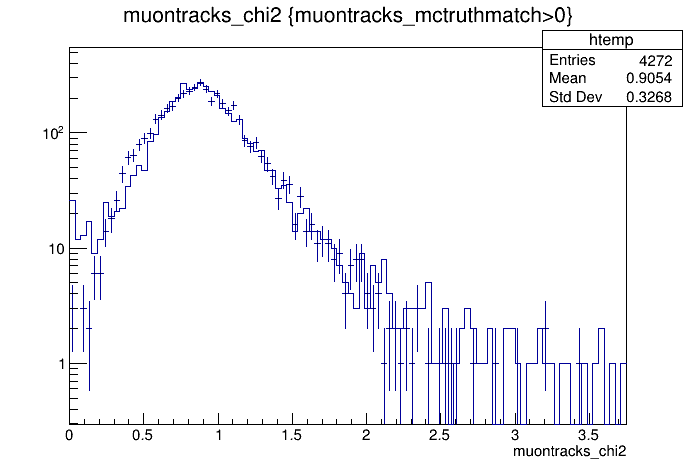

In [17]:
mytree.Draw("muontracks_chi2","muontracks_mctruthmatch>0","e")#sceglierà il range del primo
mytree.Draw("muontracks_chi2","muontracks_mctruthmatch==0","same")
c1.Draw()

In [18]:
mytree.Draw("muontracks_chi2","muontracks_mctruthmatch==0 && muontracks_chi2>3.5")

87

 matched muons with chi2 > 3.5: 0 , unmatched ones:  86


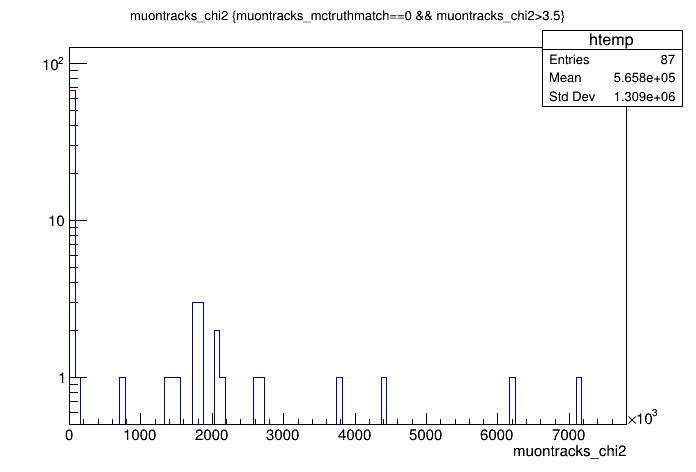

In [19]:
c1.Draw()
a=mytree.GetEntries("muontracks_mctruthmatch>0 && muontracks_chi2>3.5")
b=mytree.GetEntries("muontracks_mctruthmatch==0 && muontracks_chi2>3.5")
print(" matched muons with chi2 > 3.5:",a,", unmatched ones: ",b)

In [20]:
mytree.Scan("muontracks_chi2","muontracks_mctruthmatch==0 && muontracks_chi2>3.5")

87

***********************************
*    Row   * Instance * muontrack *
***********************************
*       80 *        0 *   1776374 *
*      157 *        0 * 5.3124551 *
*      284 *        1 * 4.4449358 *
*      450 *        0 * 4.4170608 *
*      611 *        1 *   4392569 *
*      616 *        1 * 12.621521 *
*      625 *        0 * 4.5948667 *
*      632 *        0 * 3.5683927 *
*      935 *        5 * 4.5617165 *
*     1172 *        0 *   452.875 *
*     1241 *        0 * 8.4193582 *
*     1371 *        0 * 2654962.2 *
*     1375 *        0 * 1374507.1 *
*     1455 *        3 * 39.904914 *
*     1471 *        0 * 2150757.5 *
*     1651 *        0 * 36.041931 *
*     1970 *        0 * 768.06298 *
*     2159 *        0 * 53.306839 *
*     2167 *        0 * 95.008186 *
*     2196 *        0 * 126.83771 *
*     2305 *        1 * 49.984314 *
*     2360 *        0 * 5.0108642 *
*     2394 *        3 * 36.681228 *
*     2521 *        0 * 1844362.2 *
*     2744 *        0 * 15.8

Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> 

In [21]:
mytree.Draw("muontracks_chi2","muontracks_mctruthmatch==0 && muontracks_chi2>3.4 &&  muontracks_chi2<3.6")

4

 FCN=125.874 FROM MIGRAD    STATUS=CONVERGED    1821 CALLS        1822 TOTAL
                     EDM=1.11651e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.66734e+05   1.83997e+04   2.09368e+01  -4.17471e-08
   2  p1           1.66643e+02   1.41698e+01   9.76955e-03  -2.31040e-04
   3  p2           2.22224e+03   6.76859e+01   3.58940e-01  -1.03848e-05
   4  p3           9.07507e+01   8.02250e-02   4.34699e-04  -8.70233e-03
   5  p4           3.05627e+00   1.02283e-01   5.28991e-04  -1.09488e-02
   6  p5           3.88406e+01   1.99052e+00   5.91700e-04   5.19598e-03
   7  p6          -6.31266e-01   3.05884e-02   7.47300e-06   4.32481e-01
   8  p7           3.24758e-03   1.63824e-04   7.95507e-08   3.59200e+01


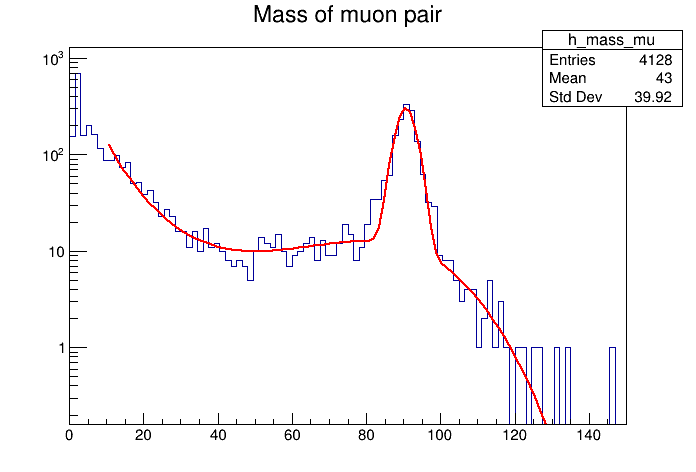

In [33]:
sigbkg = ROOT.TF1("sig_bkg","[0]/[1]*exp(-([5]*x+[6]*x*x+[7]*x*x*x)/[1])+[2]*1/([4]*TMath::Sqrt(2*TMath::Pi()))*exp(-(x-[3])*(x-[3])/(TMath::Sqrt(2)*[4]*[4]))",m_min_fit,m_max)
sigbkg.SetParameters(1000,20,1000,90,10,1,1,0.1)
c1.Draw()
h_mass_mu.Fit(sigbkg,"SR")
c1.SetLogy(1)

In [ ]:
minx=87.5
maxx=92.5
print(sigbkg.Integral(minx,maxx))
sigbkg.GetParameter(0)
h_mass_mu.Integral(h_mass_mu.FindBin(minx),h_mass_mu.FindBin(maxx))
h_mass_mu.GetBinWidth(1)
print(h_mass_mu.Integral(h_mass_mu.FindBin(minx),h_mass_mu.FindBin(maxx))*h_mass_mu.GetBinWidth(1))

# Esercizio #1 

Proviamo a stimare il numero di eventi di fondo sotto il picco con il fit in due modi diversi : fit s+b nella regione "giusta" con segnale, fit b nella regione solo fondo.



In [ ]:
#Esempio
#fbkgonly = ROOT.TF1("fbkgonly","[0]/[1]*exp(-([5]*x+[6]*x*x+[7]*x*x*x)/[1])+[2]")
#una volta con i parametri presi da un fit, una volta coi parametri presi da un altro 
#fbkgonly.SetParameters()
#fbkgonly.Integral()
#e confrontiamo i valori degli integral

# Esercizio #3


Definita la nostra selezione (es. massa >40 GeV) proviamo a studiare le altre features della muontrack:

chi2 -> chi2 del fit alla traccia
dz -> parametro di impatto lungo Z
dB -> parametro di impatto nel piano xy
isodeposits -> depositi calorimetrici intorno al muone

In [12]:
mytree.Scan("muontracks_chi2:muontracks_dz:muontracks_dB:muontracks_isoDeposits","","",10)

16

***********************************************************************
*    Row   * Instance * muontrack * muontrack * muontrack * muontrack *
***********************************************************************
*        0 *        0 * 1.0335342 * 0.0252492 * 0.0002856 * 1.0729610 *
*        0 *        1 * 1.0741999 * 0.0242608 * 0.0031903 * 2.9965186 *
*        1 *        0 *           *           *           *           *
*        2 *        0 *           *           *           *           *
*        3 *        0 * 0.7568610 * 0.0140937 * 0.0177467 *         0 *
*        3 *        1 * 0.0214010 * 12.813911 * 0.0310324 *         0 *
*        4 *        0 *           *           *           *           *
*        5 *        0 * 0.6926183 * 5.362e-05 * 2.051e-05 * 0.6069132 *
*        6 *        0 * 1.0029804 * 0.0005141 * 1.299e-05 *         0 *
*        6 *        1 * 0.4243881 * 0.0052267 * 0.0001941 * 1.2594964 *
*        7 *        0 * 1.0884974 * 2.104e-05 * 7.020e-06 *     

# Esercizio #4:

Proviamo su questo campione "mixed" di dati

In [13]:
dataFile= ROOT.TFile("Data.root")
#Nota: io l'ho scaricato in locale - potete fare lo stesso o usare il wget as you prefer :)

In [14]:
datatree= dataFile.trees.events
datatree.GetEntries()

273120

In [15]:
h_data_mass_mu_os=ROOT.TH1F("h_data_mu_os","Mass of muon pair, data",1500,m_min,m_max)
h_data_mass_mu_ss=h_data_mass_mu_os.Clone("h_data_mu_ss")

for i in range(datatree.GetEntries()):
#for i in range(100):
    datatree.GetEntry(i)
    muons=get_collection(datatree,"muontracks")
    electrons=get_collection(datatree,"electrons")
    jets=get_collection(datatree,"jets")
   
    for mi in range(len(muons)):
        for mj in range(mi):
            if(are_os(muons[mi],muons[mj])):
                h_data_mass_mu_os.Fill((muons[mi].p4+muons[mj].p4).M())
            else:
                h_data_mass_mu_ss.Fill((muons[mi].p4+muons[mj].p4).M())


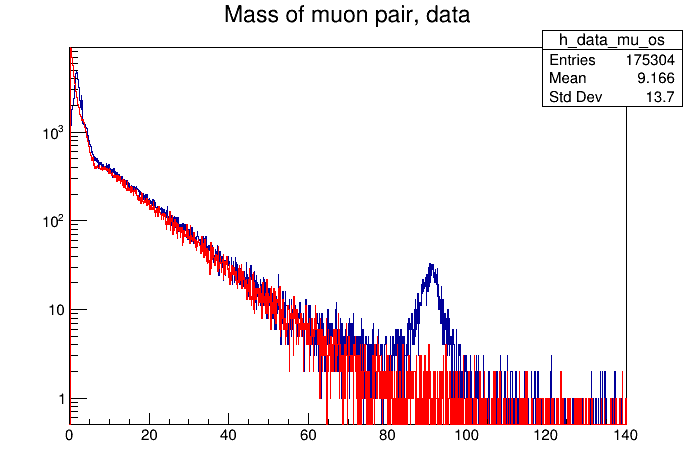

In [16]:
c1.Draw()
h_data_mass_mu_os.Draw()
h_data_mass_mu_ss.SetLineColor(ROOT.kRed)
h_data_mass_mu_ss.Draw("same")
h_data_mass_mu_os.GetXaxis().SetRangeUser(0,140)
#h_data_mass_mu_os.Rebin(2)
#h_data_mass_mu_ss.Rebin(2)
c1.Update()

